In [2]:
%pylab inline

import numpy as np
import scipy.fftpack

# Plotting
import matplotlib.pyplot as plt
import timeit

#import cbcrom.chebyshev as cheb

sys.path.insert(0, '/Users/lackey/src/Smolyak/smolyak')

Populating the interactive namespace from numpy and matplotlib


In [3]:
from grid import SmolyakGrid
from interp import SmolyakInterp

# 2d interpolation

In [4]:
func = lambda x, y: x**2 - y**2
func1 = lambda points: func(points[:, 0], points[:, 1])

In [7]:
d = 2
mu = 3
#mu = [4, 3, 3]
f = func1

lb = -10.0 * np.ones(d)
ub = 10.0 * np.ones(d)
sg = SmolyakGrid(d, mu, lb, ub)

f_on_grid = f(sg.grid)
si = SmolyakInterp(sg, f_on_grid)

In [8]:
np.random.seed(42)
test_points = np.random.randn(100, d)
# Make sure it is bounded by -2, 2
test_points = 2*test_points/np.max(np.abs(test_points))

true_vals = f(test_points)
interp_vals = si.interpolate(test_points)

In [10]:
si.interpolate(np.array([[5, 2]]))[0]

20.999999999999989

In [11]:
lb, ub

(array([-10., -10.]), array([ 10.,  10.]))

In [12]:
print len(sg.cube_grid)
print sg.cube_grid

29
[[ 0.         -1.        ]
 [ 0.          1.        ]
 [-1.          0.        ]
 [ 1.          0.        ]
 [ 0.         -0.70710678]
 [ 0.          0.70710678]
 [-0.70710678  0.        ]
 [ 0.70710678  0.        ]
 [ 0.         -0.92387953]
 [ 0.         -0.38268343]
 [ 0.          0.38268343]
 [ 0.          0.92387953]
 [-0.92387953  0.        ]
 [-0.38268343  0.        ]
 [ 0.38268343  0.        ]
 [ 0.92387953  0.        ]
 [-1.         -1.        ]
 [-1.          1.        ]
 [ 1.         -1.        ]
 [ 1.          1.        ]
 [-1.         -0.70710678]
 [-1.          0.70710678]
 [ 1.         -0.70710678]
 [ 1.          0.70710678]
 [-0.70710678 -1.        ]
 [-0.70710678  1.        ]
 [ 0.70710678 -1.        ]
 [ 0.70710678  1.        ]
 [ 0.          0.        ]]


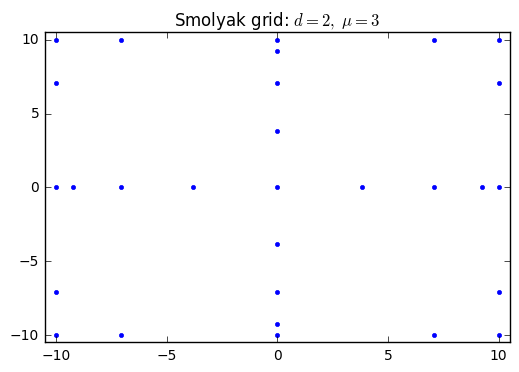

In [13]:
sg.plot_grid();

## Sparse grid interpolation

In [14]:
def f(x, y, z):
    xpart = np.sin(x+1.0) - 0.00001*x**7 + 0.000003*x**9 + 6.0
    ypart = 0.0001*(y**6 + y**7) + 3.0
    zpart = 1.0/(1.0+(z-1)**2) + 1.0
    #zpart = 0.0001*(z**6 + z**7)*np.sin(0.1*z*y-1.234) + 3.0
    return xpart * ypart * zpart

Nx = 16
Ny = 19
Nz = 23
xlow, xhigh = -5.0, 5.0
ylow, yhigh = -4.0, 4.0
zlow, zhigh = -3.0, 2.0

In [15]:
d = 3
mu = 6
#mu = [5, 5, 5]

lb = np.array([xlow, ylow, zlow])
ub = np.array([xhigh, yhigh, zhigh])
sg = SmolyakGrid(d, mu, lb, ub)

f_on_grid = [f(sg.grid[i, 0], sg.grid[i, 1], sg.grid[i, 2]) for i in range(len(sg.grid))]
si = SmolyakInterp(sg, f_on_grid)

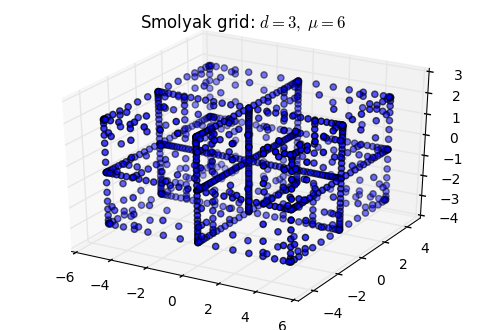

In [16]:
sg.plot_grid();

In [17]:
len(sg.cube_grid), len(sg.grid), len(f_on_grid)

(1073, 1073, 1073)

In [18]:
sg.cube_grid[0], sg.grid[0], f_on_grid[0]

(array([ 0.,  0., -1.]), array([ 0.,  0., -3.]), 21.731731363507436)

In [19]:
x, y, z = 1.3, 2.7, -1.5
print si.interpolate(np.array([[x, y, z]]))[0], f(x, y, z) 

23.7031061685 24.1286730749


In [20]:
xval = np.linspace(xlow, xhigh, 20)
yval = np.linspace(ylow, yhigh, 20)
zval = np.linspace(zlow, zhigh, 20)

farray = np.array([[[f(x, y, z) for z in zval] for y in yval] for x in xval]).flatten()
finterparray = np.array([[[si.interpolate(np.array([[x, y, z]]))[0] for z in zval] for y in yval] for x in xval]).flatten()

print np.max(finterparray/farray - 1.0)
print np.max(finterparray - farray)

0.040469237647
1.27642375249


# 5d interpolation

In [44]:
def f(x):
    x0part = np.sin(x[0]+1.0) - 0.00001*x[0]**7 + 0.000003*x[0]**9 + 6.0
    x1part = np.sin(x[1]+1.0) - 0.00001*x[1]**7 + 0.000003*x[1]**9 + 6.0
    x2part = np.sin(x[2]+1.0) - 0.00001*x[2]**7 + 0.000003*x[2]**9 + 6.0
    x3part = np.sin(x[3]+1.0) - 0.00001*x[3]**7 + 0.000003*x[3]**9 + 6.0
    x4part = np.sin(x[4]+1.0) - 0.00001*x[4]**7 + 0.000003*x[4]**9 + 6.0
    #x1part = 0.0001*(x[1]**6 + x[1]**7) + 3.0
    #x2part = 1.0/(1.0+(x[2]-1)**2) + 1.0
    #zpart = 0.0001*(z**6 + z**7)*np.sin(0.1*z*y-1.234) + 3.0
    return x0part*x1part*x2part*x3part*x4part

In [49]:
def f(x):
    x0part = np.sin(x[0]+1.0)+2.0
    x1part = np.sin(x[1]+1.0)+2.0
    x2part = np.sin(x[2]+1.0)+2.0
    x3part = np.sin(x[3]+1.0)+2.0
    x4part = np.sin(x[4]+1.0)+2.0
    return x0part*x1part*x2part*x3part*x4part

In [50]:
f(np.array([2, 2, 2, 2, 2]))

44.999226551726174

In [51]:
d = 5
mu = 5

lb = -2.0*np.ones(d)
ub = 2.0*np.ones(d)
sg = SmolyakGrid(d, mu, lb, ub)

f_on_grid = [f(sg.grid[i]) for i in range(len(sg.grid))]
si = SmolyakInterp(sg, f_on_grid)

In [52]:
len(sg.cube_grid), len(sg.grid), len(f_on_grid)

(2433, 2433, 2433)

In [53]:
x = np.array([1.3, 1.7, -1.5, 0.1, 0.7])
print si.interpolate(np.array([x]))[0], f(x) 

87.6939054931 87.657992809


# 9d interpolation

In [54]:
def f(x):
    x0part = np.sin(x[0]+1.0)+2.0
    x1part = np.sin(x[1]+1.0)+2.0
    x2part = np.sin(x[2]+1.0)+2.0
    x3part = np.sin(x[3]+1.0)+2.0
    x4part = np.sin(x[4]+1.0)+2.0
    x5part = np.sin(x[5]+1.0)+2.0
    x6part = np.sin(x[6]+1.0)+2.0
    x7part = np.sin(x[7]+1.0)+2.0
    x8part = np.sin(x[8]+1.0)+2.0
    return x0part*x1part*x2part*x3part*x4part*x5part*x6part*x7part*x8part

In [109]:
def f_rand(x):
    """multiply by random term.
    """
    df = 0.1
    rand = np.random.uniform(-df, df)
    x0part = np.sin(x[0]+1.0)+2.0
    x1part = np.sin(x[1]+1.0)+2.0
    x2part = np.sin(x[2]+1.0)+2.0
    x3part = np.sin(x[3]+1.0)+2.0
    x4part = np.sin(x[4]+1.0)+2.0
    x5part = np.sin(x[5]+1.0)+2.0
    x6part = np.sin(x[6]+1.0)+2.0
    x7part = np.sin(x[7]+1.0)+2.0
    x8part = np.sin(x[8]+1.0)+2.0
    return x0part*x1part*x2part*x3part*x4part*x5part*x6part*x7part*x8part*(1+rand)

In [110]:
print np.random.uniform(-100.0, 100.0)

24.6628867518


In [118]:
f(np.array([2, 2, 2, 2, 2, 2, 2, 2, 2])), f_rand(np.array([2, 2, 2, 2, 2, 2, 2, 2, 2]))

(945.73418707549592, 981.51005486640202)

In [103]:
d = 9
mu = 4

lb = -2.0*np.ones(d)
ub = 2.0*np.ones(d)
sg = SmolyakGrid(d, mu, lb, ub)

f_on_grid = [f(sg.grid[i]) for i in range(len(sg.grid))]
si = SmolyakInterp(sg, f_on_grid)

In [128]:
d = 9
mu = 3

lb = -2.0*np.ones(d)
ub = 2.0*np.ones(d)
sg = SmolyakGrid(d, mu, lb, ub)

f_on_grid = [f_rand(sg.grid[i]) for i in range(len(sg.grid))]
si = SmolyakInterp(sg, f_on_grid)

In [129]:
len(sg.cube_grid), len(sg.grid), len(f_on_grid)

(1177, 1177, 1177)

In [130]:
x = np.array([1.3, 1.7, -1.5, 0.1, 0.7, 0.3, 0.9, -1.1, 0.8])
fint = si.interpolate(np.array([x]))[0]
ftrue = f(x)
print fint, ftrue, fint/ftrue-1

9652.10195561 4325.06210901 1.23166782634
